# Имитация случайных процессов и их характеристик

## Init

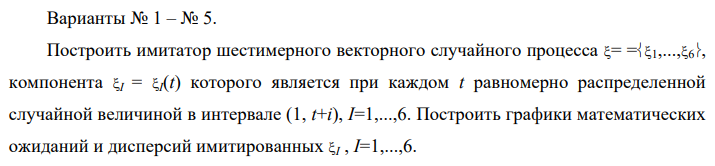

## Implementation

### Def-s

In [ ]:
import random
import matplotlib.pyplot as plt


def math_expect(s):
    """ * Calculate math expectation """
    return sum(s)/len(s)


def dispersion(s, M = None):
    """ * Calculate dispersion.
    * Use M - as math expectation if it known
    * else calculate it """
    if M is None:
        M = math_expect(s)
    n = len(s)
    D = 0
    for i in range(n):
        D += (s[i] - M)**2
    return D/n


def white_noize():
    s = 0
    for i in range(12):
        s += random.random()
    return s - 6


def normal_dist_val(M, D):
    return white_noize() * D ** 0.5 + M

### Values calculating

In [14]:
I = [e for e in range(1, 7)]
T = [t for t in range(2000)]
vals = [[] for e in I]

for t in T:
    for i in I:
        vals[i - 1] += [normal_dist_val(1,  t + i)]
    math_expects = [math_expect(vals[i - 1]) for i in I]
    dispersions = [dispersion(vals[i - 1], math_expects[i - 1]) for i in I]

D = []
M = []
#s = []

for t in T:
    s = [vals[i - 1][t] for i in I]
    m = math_expect(s)
    d = dispersion(s, m)
    M += [m]
    D += [d]

### Display results

In [49]:
fig, axs = plt.subplots(4, 1, constrained_layout=True)
axs[0].scatter(I, math_expects, 25, 'black')
axs[0].plot(I, math_expects, c='purple')
axs[0].set_title('Math expectations plot')
axs[0].set_xlabel('Component, i')
axs[0].set_ylabel('Math expectations, M')
axs[1].scatter(T, M, 25, 'black')
axs[1].plot(T, M, c='purple')
axs[1].set_title('Math expectation plot')
axs[1].set_xlabel('Tiem, t')
axs[1].set_ylabel('Math expectation, M')
axs[2].scatter(I, dispersions, c='black')
axs[2].plot(I, dispersions, c='purple')
axs[2].set_title('Variances plot')
axs[2].set_xlabel('Component, i')
axs[2].set_ylabel('Variance, D')
axs[3].scatter(T, D, 25, 'black')
axs[3].plot(T, D, c='purple')
axs[3].set_title('Variance plot')
axs[3].set_xlabel('Time, t')
axs[3].set_ylabel('Variance, D')
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)
axs[3].grid(True)
%matplotlib
plt.show()

Using matplotlib backend: TkAgg
